In [1]:
%load_ext autoreload
%autoreload 2

pattern = "pattern-12"

entrypoint = pattern
app_cwl_file = f"../cwl-workflow/{pattern}.cwl"

try:
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys

    module_path = os.path.abspath(os.path.join("."))  # or the path to your source code
    sys.path.insert(0, module_path)

from helpers import WorkflowViewer, WorkflowWrapper
from cwl_loader import dump_cwl
from pathlib import Path

In [2]:
wf = WorkflowViewer.from_file(app_cwl_file, entrypoint)

2025-09-05 12:08:04.320 | DEBUG    | cwl_loader:load_cwl_from_location:196 - Loading CWL document from ../cwl-workflow/pattern-12.cwl...
2025-09-05 12:08:04.321 | DEBUG    | cwl_loader:_load_cwl_from_stream:199 - Reading stream from ../cwl-workflow/pattern-12.cwl...


2025-09-05 12:08:04.371 | DEBUG    | cwl_loader:load_cwl_from_stream:173 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-05 12:08:04.372 | DEBUG    | cwl_loader:load_cwl_from_yaml:124 - Updating the model of type 'CommentedMap' to version 'v1.2'...
2025-09-05 12:08:04.377 | DEBUG    | cwl_loader:load_cwl_from_yaml:135 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-09-05 12:08:05.356 | DEBUG    | cwl_loader:load_cwl_from_yaml:143 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-09-05 12:08:05.356 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning Workflow pattern-12...
2025-09-05 12:08:05.357 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning CommandLineTool crop...
2025-09-05 12:08:05.357 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning CommandLineTool norm_diff...
2025-09-05 12:08:05.358 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning

## Application Package Pattern 12

This patterns publishes all products generated by all steps

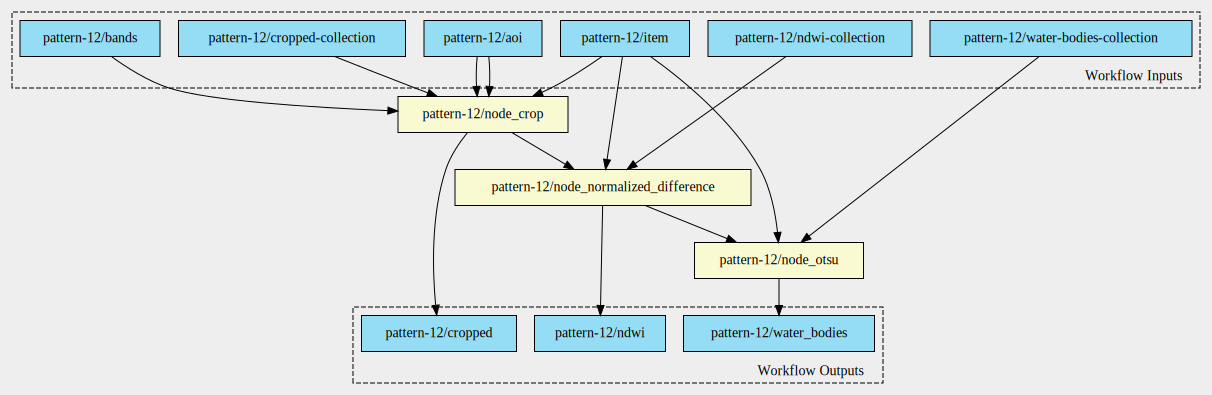

In [3]:
wf.plot()

### Inputs

In [4]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `https://raw.githubusercontent.com/eoap/schemas/main/ogc.yaml#BBox` | area of interest | area of interest as a bounding box |
| `bands` | `string[]` | bands used for the NDWI | bands used for the NDWI |
| `item` | `Directory` | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |
| `cropped-collection` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | cropped reflectances STAC Collection | STAC Collection URL for the cropped reflectances |
| `ndwi-collection` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | NDWI STAC Collection | STAC Collection URL for the NDWI |
| `water-bodies-collection` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Water bodies STAC Collection | STAC Collection URL for the water bodies |


### Steps

In [5]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `node_crop` | `#crop` | None | None |
| `node_normalized_difference` | `#norm_diff` | None | None |
| `node_otsu` | `#otsu` | None | None |


### Outputs

In [6]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `cropped` | `Directory[]` | Cropped reflectances | Cropped reflectances |
| `ndwi` | `Directory` | Normalized Difference Water Index | Normalized Difference Water Index calculated from the input bands |
| `water_bodies` | `Directory` | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |


## Data flow management

In [7]:
w = WorkflowWrapper(workflow=wf.workflow, entrypoint=entrypoint)
wrapped = w.wrap()

app_cwl_file = f".{entrypoint}.cwl"

with open(app_cwl_file, "w") as f:
    dump_cwl(process=wrapped, stream=f)

2025-09-05 12:08:07.431 | DEBUG    | cwl_loader:load_cwl_from_location:196 - Loading CWL document from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/develop/templates/stage-in.cwl...
2025-09-05 12:08:07.610 | DEBUG    | cwl_loader:_load_cwl_from_stream:199 - Reading stream from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/develop/templates/stage-in.cwl...
2025-09-05 12:08:07.616 | DEBUG    | cwl_loader:load_cwl_from_stream:173 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-05 12:08:07.617 | DEBUG    | cwl_loader:load_cwl_from_yaml:124 - Updating the model of type 'CommentedMap' to version 'v1.2'...
2025-09-05 12:08:07.617 | DEBUG    | cwl_loader:load_cwl_from_yaml:135 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-09-05 12:08:08.502 | DEBUG    | cwl_loader:load_cwl_from_yaml:143 - Raw CWL document successfully updated to v1

In [8]:
wf = WorkflowViewer(cwl_file=app_cwl_file, workflow=wrapped, entrypoint="main")

wf.plot()

  Edge main/directory_stage_in_0 -> main/another_input
Error: lost main/another_input main/directory_stage_in_0 edge


CalledProcessError: Command '[PosixPath('dot'), '-Kdot', '-Tsvg']' returned non-zero exit status 1. [stderr: 'Warning: flat edge between adjacent nodes one of which has a record shape - replace records with HTML-like labels\n  Edge main/directory_stage_in_0 -> main/another_input\nError: lost main/another_input main/directory_stage_in_0 edge\n']

### Workflow components diagram

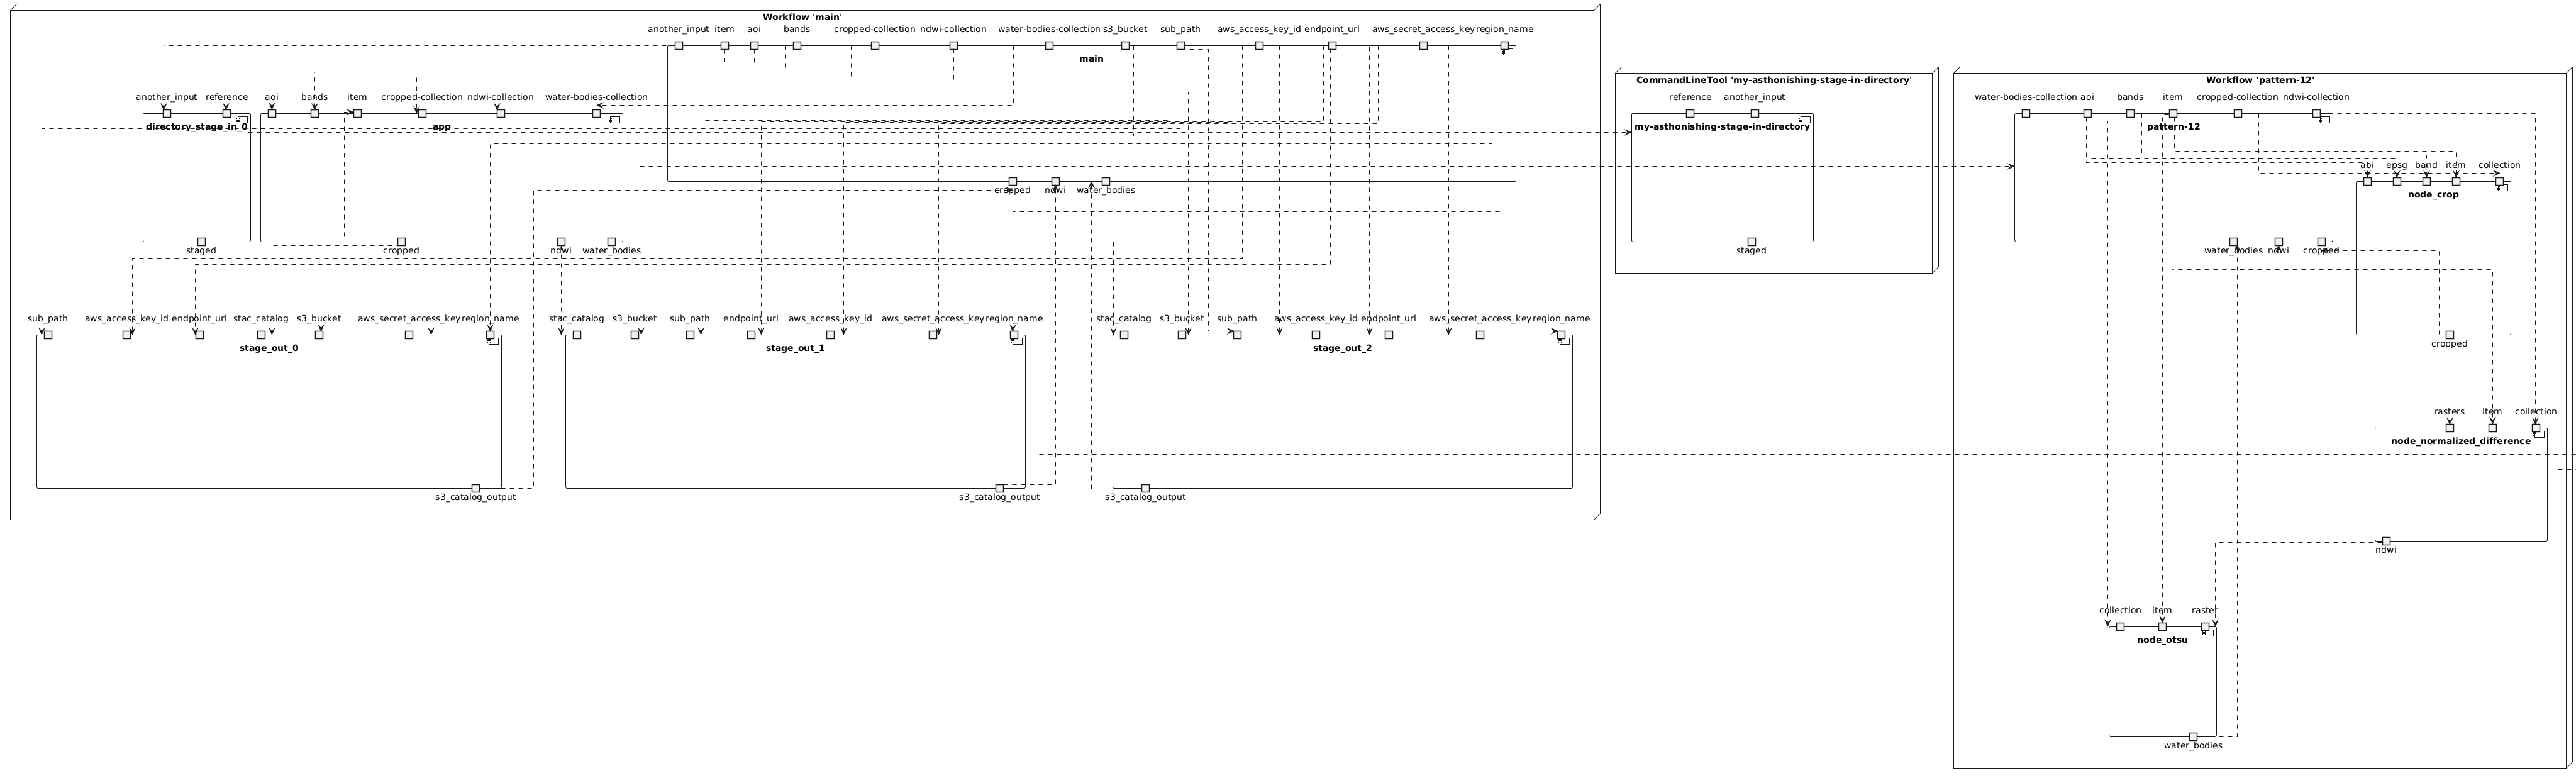

In [9]:
wf.display_components_diagram()

### Inputs

In [10]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `https://raw.githubusercontent.com/eoap/schemas/main/ogc.yaml#BBox` | area of interest - pattern-12/aoi | area of interest as a bounding box - This parameter is derived from pattern-12/aoi |
| `bands` | `string[]` | bands used for the NDWI - pattern-12/bands | bands used for the NDWI - This parameter is derived from pattern-12/bands |
| `another_input` | `string` | Another Input - my-asthonishing-stage-in-directory/another_input | An additional input for demonstration purposes - This parameter is derived from my-asthonishing-stage-in-directory/another_input |
| `item` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Landsat-8/9 acquisition reference - pattern-12/item | Landsat-8/9 acquisition reference - This parameter is derived from pattern-12/item |
| `cropped-collection` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | cropped reflectances STAC Collection - pattern-12/cropped-collection | STAC Collection URL for the cropped reflectances - This parameter is derived from pattern-12/cropped-collection |
| `ndwi-collection` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | NDWI STAC Collection - pattern-12/ndwi-collection | STAC Collection URL for the NDWI - This parameter is derived from pattern-12/ndwi-collection |
| `water-bodies-collection` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Water bodies STAC Collection - pattern-12/water-bodies-collection | STAC Collection URL for the water bodies - This parameter is derived from pattern-12/water-bodies-collection |
| `s3_bucket` | `string` | my-super-stage-out/s3_bucket | This parameter is derived from: my-super-stage-out/s3_bucket |
| `sub_path` | `string` | my-super-stage-out/sub_path | This parameter is derived from: my-super-stage-out/sub_path |
| `aws_access_key_id` | `string` | my-super-stage-out/aws_access_key_id | This parameter is derived from: my-super-stage-out/aws_access_key_id |
| `aws_secret_access_key` | `string` | my-super-stage-out/aws_secret_access_key | This parameter is derived from: my-super-stage-out/aws_secret_access_key |
| `region_name` | `string` | my-super-stage-out/region_name | This parameter is derived from: my-super-stage-out/region_name |
| `endpoint_url` | `string` | my-super-stage-out/endpoint_url | This parameter is derived from: my-super-stage-out/endpoint_url |


### Steps

In [11]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `directory_stage_in_0` | `#my-asthonishing-stage-in-directory` | None | None |
| `app` | `#pattern-12` | None | None |
| `stage_out_0` | `#my-super-stage-out` | None | None |
| `stage_out_1` | `#my-super-stage-out` | None | None |
| `stage_out_2` | `#my-super-stage-out` | None | None |


### Outputs

In [12]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `cropped` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI[]` | Cropped reflectances | Cropped reflectances |
| `ndwi` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Normalized Difference Water Index | Normalized Difference Water Index calculated from the input bands |
| `water_bodies` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |


## Execution


In [13]:
from cwltool.main import main
from io import StringIO
import argparse
import yaml

In [14]:
params = {
    "aoi": {
        "class": "https://raw.githubusercontent.com/eoap/schemas/main/ogc.yaml#BBox",
        "bbox": [-118.985, 38.432, -118.183, 38.938],
        "crs": "CRS84",
    },
    "item": {
        "class": "https://raw.githubusercontent.com/eoap/schemas/main/ogc.yaml#URI",
        "value": "https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2/items/LC08_L2SP_042033_20231007_02_T1",
    },
    "bands": ["green", "nir08"],
    "cropped-collection": {
        "class": "https://raw.githubusercontent.com/eoap/schemas/main/ogc.yaml#URI",
        "value": "https://github.com/eoap/application-package-patterns/raw/refs/heads/develop/collections/cropped_collection.json",
    },
    "ndwi-collection": {
        "class": "https://raw.githubusercontent.com/eoap/schemas/main/ogc.yaml#URI",
        "value": "https://github.com/eoap/application-package-patterns/raw/refs/heads/develop/collections/ndi_collection.json",
    },
    "water-bodies-collection": {
        "class": "https://raw.githubusercontent.com/eoap/schemas/main/ogc.yaml#URI",
        "value": "https://github.com/eoap/application-package-patterns/raw/refs/heads/develop/collections/water_bodies_collection.json",
    },
}

additional_params = {
    "another_input": "some_value",
    "s3_bucket": "my-bucket",
    "sub_path": "my/sub/path",
    "aws_access_key_id": "test",
    "aws_secret_access_key": "test",
    "region_name": "us-west-1",
    "endpoint_url": "https://s3.us-west-1.amazonaws.com",
}

with open(".params.yaml", "w") as f:
    yaml.dump({**params, **additional_params}, f)

In [ ]:
parsed_args = argparse.Namespace(
    podman=False,
    debug=False,
    validate=False,
    outdir="./runs",
    workflow=f"{app_cwl_file}#main",
    job_order=[".params.yaml"],
)

stream_out = StringIO()
stream_err = StringIO()

res = main(
    args=parsed_args,
    stdout=stream_out,
    stderr=stream_err,
)

assert res == 0

print(stream_out.getvalue())

INFO /home/fbrito/.local/share/hatch/env/virtual/patterns/VcrZkRRN/patterns/lib/python3.13/site-packages/ipykernel_launcher.py 3.1.20250715140722
INFO Resolved '.pattern-12.cwl#main' to 'file:///data/work/github/eoap/application-package-patterns/docs/.pattern-12.cwl#main'


WARNING https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml:15:3: object name 'https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#Date' previously defined
WARNING https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml:17:5: object name 'https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#Date/value' previously defined
WARNING https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml:24:3: object name 'https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#DateTime' previously defined
WARNING https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml:26:5: object name 'https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#DateTime/value' previously defined
WARNING https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml:33:3: object name 'https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#Duration' previously defined
WARNIN

{
    "cropped": [
        {
            "value": "s3://my-bucket/my/sub/path-k9l5c0/catalog.json",
            "type": "https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI"
        },
        {
            "value": "s3://my-bucket/my/sub/path-a1xold/catalog.json",
            "type": "https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI"
        }
    ],
    "ndwi": {
        "value": "s3://my-bucket/my/sub/path-5yf15v/catalog.json",
        "type": "https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI"
    },
    "water_bodies": {
        "value": "s3://my-bucket/my/sub/path-qw9cp3/catalog.json",
        "type": "https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI"
    }
}
